<a href="https://colab.research.google.com/github/ashishsid0467gmailcom/Play-store-app-user-review-analysis/blob/main/Copy_of_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

#**Hello everyone in this colab notebook, I am going to analyze with the Google play store data.**

So first of all we will discuss what is Exploratory data analysis (EDA)-

    EDA is besically an approch of analyzing data sets to summerize their main characteristics,
     often using statistical graphics and other data vizualisation methood.


In [ ]:
# import all the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# import drive from google.colab
# I can import my drive by using the following mount code
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Here I will import the Play store data file
Apps_path = '/content/drive/MyDrive/capstone project/Copy of Play Store Data.csv'
Apps_df=pd.read_csv(Apps_path)
print(Apps_df)

                                                     App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Reviews      

# Here I can see that how many unique catagory of apps is there in our data set

In [ ]:
# Here I can see that how many unique catagory of apps is there in
cat= Apps_df.Category.unique()
cat

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

#My Problem Statements are
# 1- Which category of apps has more important in accordance to public demand?
# 2- The category which is most popular category, check how much of them are free and paid?
# 3- We will analyze that whether free or paid apps has more in number?
# 4- Which app category  has most number of downloads?
# 5- Which category of apps has highest reviews?
# 6- Which genres of app is most popular?

In [ ]:
# Here we can find the first 5 rows from up by the following comand
Apps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Also here we can find the last 5 rows  by using the following comand
Apps_df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [ ]:
# Now we will check that hows many rows and columns is presnt in our data set
Apps_df.shape

(10841, 13)

In [ ]:
Apps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
Apps_df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


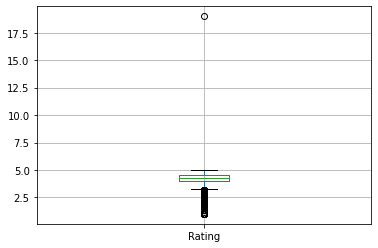

In [ ]:
Apps_df.boxplot()

In [ ]:
# from the above plot we can see all the ratings are below 5, but less number is above 5 so here we will check that how many of the apps has rating more than 5
Apps_df[Apps_df.Rating>5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [ ]:
# now we will remove the column having rating more than 5
Apps_df.drop([10472], inplace=True)

In [ ]:
# now we will check whether the row having rating more than 5 is deleted or not
Apps_df[10470:10475]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10470,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
10471,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
10473,osmino Wi-Fi: free WiFi,TOOLS,4.2,134203,4.1M,"10,000,000+",Free,0,Everyone,Tools,"August 7, 2018",6.06.14,4.4 and up
10474,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
10475,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


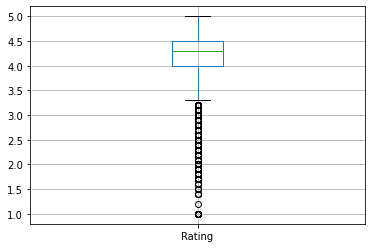

In [ ]:
# now with help of box plot we can also check whether the row having rating with more than 5 is deleted or not
Apps_df.boxplot()

In [ ]:
# Again we can check how many null values in each columns
Apps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [ ]:
# As we can see that there is number of null values are present in our data set
# So we will convert the ull values into numeric values by median method
def impute_median(series):
  return series.fillna(series.median)

In [ ]:
# Here we will replace nan values of rating column
Apps_df.Rating=Apps_df['Rating'].transform(impute_median)

In [ ]:
#Now we will replace the null values in Type column
print(Apps_df['Type'].mode())
print(Apps_df['Current Ver'].mode())
print(Apps_df['Android Ver'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object


As here we saw that Type, Current ver and Android Ver  has object values so here we will perform another methood i.e. mode

In [ ]:
Apps_df['Type'].fillna(str(Apps_df['Type'].mode().values[0]),inplace=True)
Apps_df['Android Ver'].fillna(str(Apps_df['Android Ver'].mode().values[0]),inplace=True)
Apps_df['Current Ver'].fillna(str(Apps_df['Current Ver'].mode().values[0]),inplace=True)

In [ ]:
Apps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

We have cleaned all the null values and one outlier, so now we can solve our problem statement.

 Question.1 Which category of apps has more important in accordance to public demand

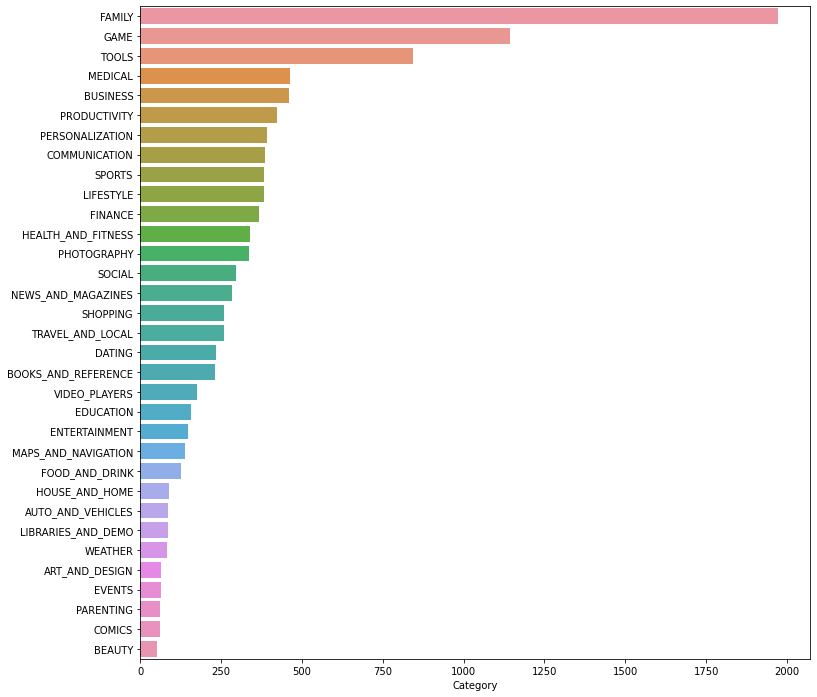

In [ ]:
plt.figure(figsize=(12,12))
imp_cat=Apps_df.Category.value_counts()
sns.barplot(x=imp_cat,y=imp_cat.index, data=Apps_df)

Coclussion of 1st question- 
#We have a total 34 number of app category. 
#And from the bar plot I found that there is a huge demand of app in Family category than other categories. And the number of apps in the category of Family is around 2000.

Question.2-The category which is most popular category, check how much of them are free and paid?

Category           Type
ART_AND_DESIGN     Free     62
                   Paid      3
AUTO_AND_VEHICLES  Free     82
                   Paid      3
BEAUTY             Free     53
                          ... 
TRAVEL_AND_LOCAL   Paid     12
VIDEO_PLAYERS      Free    171
                   Paid      4
WEATHER            Free     74
                   Paid      8
Name: Type, Length: 63, dtype: int64


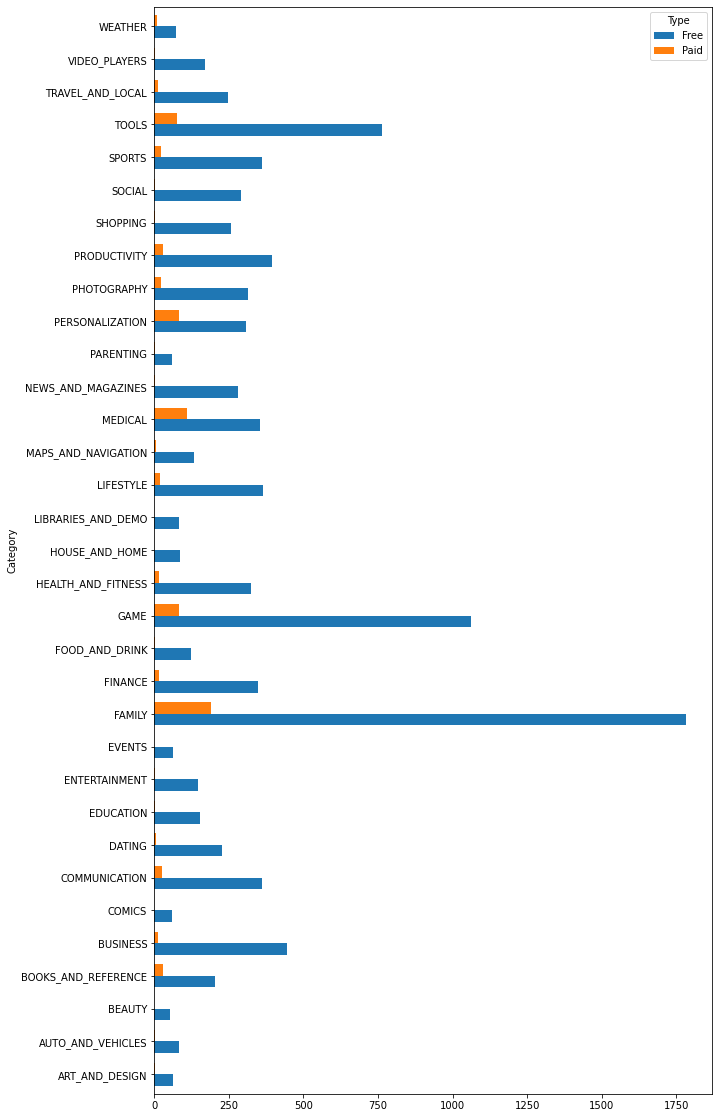

In [ ]:
print(Apps_df.groupby('Category')['Type'].value_counts())
Type_cat=Apps_df.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(10,20), width=0.7)
plt.show()


Conclusion of Question no.2 
is Family category is most popular and most of them are of free type

Category           Type
ART_AND_DESIGN     Free     62
                   Paid      3
AUTO_AND_VEHICLES  Free     82
                   Paid      3
BEAUTY             Free     53
                          ... 
TRAVEL_AND_LOCAL   Paid     12
VIDEO_PLAYERS      Free    171
                   Paid      4
WEATHER            Free     74
                   Paid      8
Name: Type, Length: 63, dtype: int64


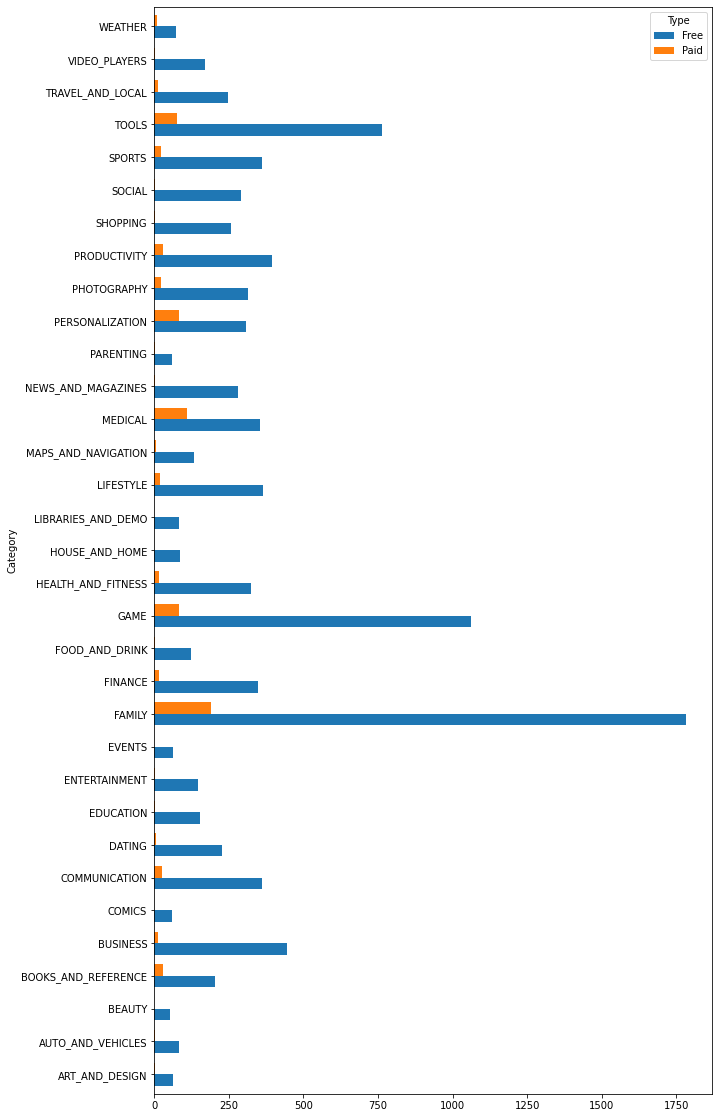

In [ ]:
#Question.3- We will analyze that whether free or paid apps has more in number
print(Apps_df.groupby('Category')['Type'].value_counts())
Type_cat=Apps_df.groupby('Category')['Type'].value_counts().unstack().plot.barh(figsize=(10,20), width=0.7)
plt.show()

Conclussion of Question  3-
#As Family category is popular among all the category. From the graph We can see that most of the apps from Family category is free.
# Also for all category we can see that number of apps in free type is more than paid.

#Question no-4 Which app category  has most number of downloads.

In [ ]:
Apps_df.groupby(['Installs'])['Category'].max()

Installs
0                           FAMILY
0+                TRAVEL_AND_LOCAL
1+                TRAVEL_AND_LOCAL
1,000+                     WEATHER
1,000,000+                 WEATHER
1,000,000,000+       VIDEO_PLAYERS
10+                        WEATHER
10,000+                    WEATHER
10,000,000+                WEATHER
100+                 VIDEO_PLAYERS
100,000+                   WEATHER
100,000,000+         VIDEO_PLAYERS
5+                TRAVEL_AND_LOCAL
5,000+                     WEATHER
5,000,000+                 WEATHER
50+               TRAVEL_AND_LOCAL
50,000+                    WEATHER
50,000,000+                WEATHER
500+                       WEATHER
500,000+                   WEATHER
500,000,000+         VIDEO_PLAYERS
Name: Category, dtype: object

#Conlusion of question number 4 is-
# The maximum number of download of app is on video player category and the number is more than 1000000000

Question no.5 Which category of apps has highest reviews?

In [ ]:
Apps_df.groupby(['Category'])['Reviews'].max()

Category
ART_AND_DESIGN            967
AUTO_AND_VEHICLES         994
BEAUTY                    964
BOOKS_AND_REFERENCE        98
BUSINESS               984451
COMICS                   9952
COMMUNICATION           99559
DATING                  97699
EDUCATION               99020
ENTERTAINMENT            9941
EVENTS                     99
FAMILY                    997
FINANCE                   967
FOOD_AND_DRINK             95
GAME                     9951
HEALTH_AND_FITNESS        979
HOUSE_AND_HOME            874
LIBRARIES_AND_DEMO        929
LIFESTYLE                 987
MAPS_AND_NAVIGATION        96
MEDICAL                  9945
NEWS_AND_MAGAZINES        978
PARENTING                  99
PERSONALIZATION            98
PHOTOGRAPHY             98717
PRODUCTIVITY             9914
SHOPPING                 9975
SOCIAL                   9606
SPORTS                   9992
TOOLS                     999
TRAVEL_AND_LOCAL         9971
VIDEO_PLAYERS            9966
WEATHER                981995
N

For Question number 5 I the found that the maximum number of review is for Business category.

Question no.6- Which genres of app is most popular?

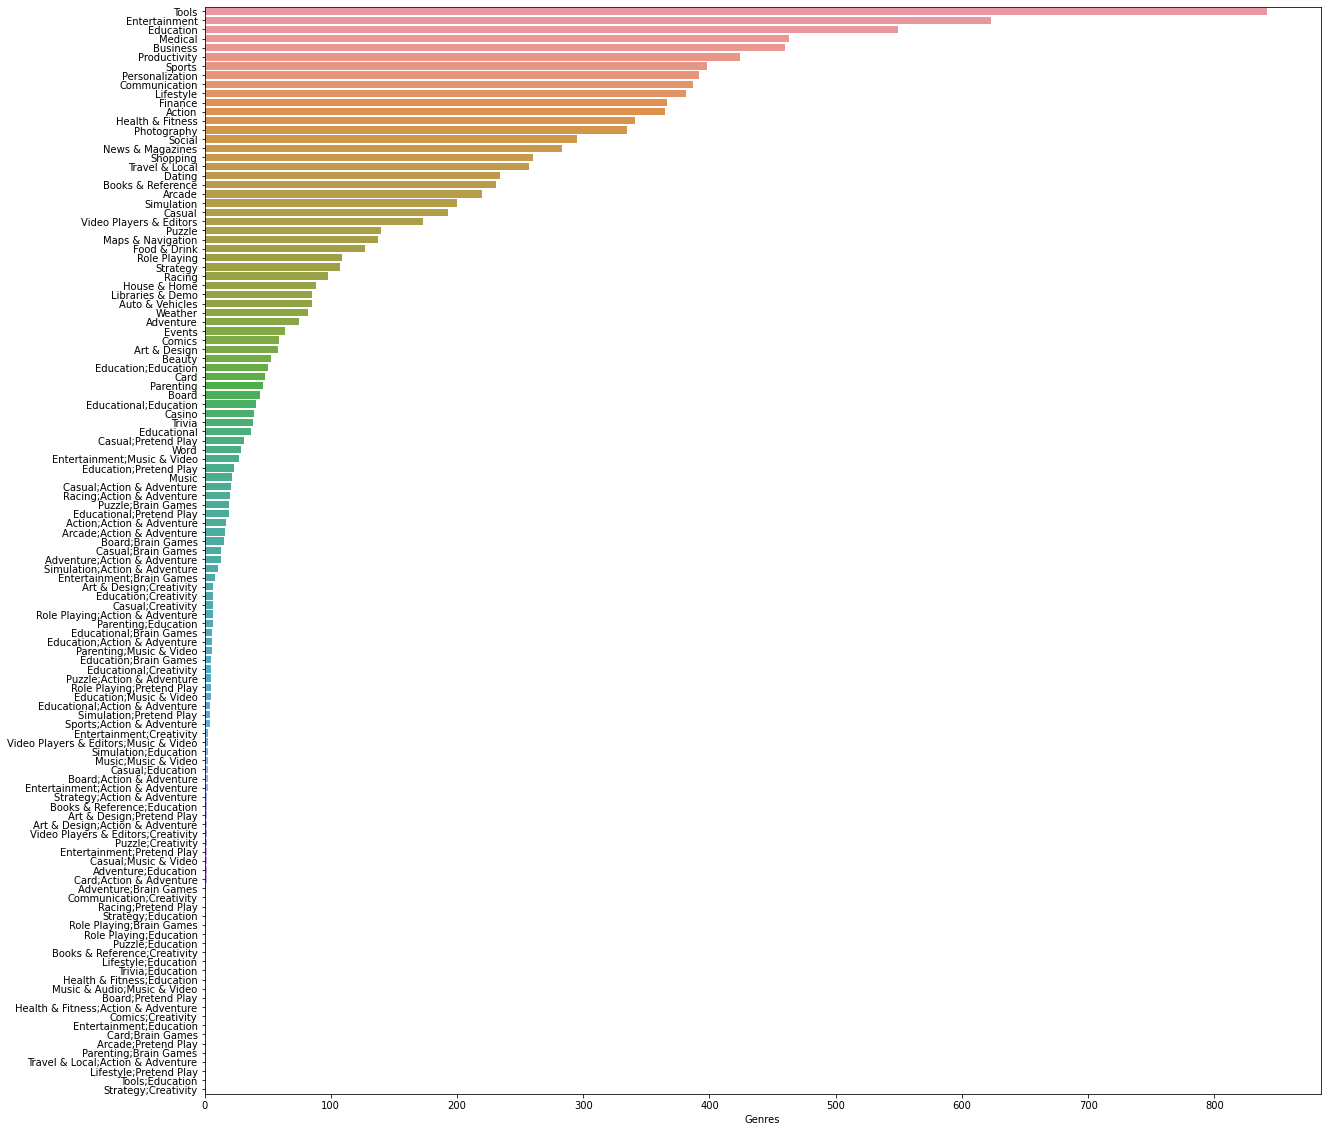

In [ ]:
plt.figure(figsize=(20,20))
imp_cat=Apps_df.Genres.value_counts()
sns.barplot(x=imp_cat,y=imp_cat.index, data=Apps_df)

For question number 6 From the graph we can see that the Tools genres is prpular among all.

Analysis
I have analysed the play store app data and found that


1- We have a total 34 number of app category.And  I found that there is a huge demand of app in Family category than other categories. And the number of apps in the category of Family is around 2000.


2- Family category app is most popular app and in this category the number of free apps is 1750 and paid is 250.


3- The total number of free app number is more than paid.


4- The video player category has the maximum nuber of installs.


5- The  Business category apps has highest reviews.


6- The apps under Tools Genres are most popular.
